## The purpose of this file
Delve into time evolving network constructed from hashtag search on "スイーツ".

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import toolbox as tb
%matplotlib inline

In [2]:
tag = "sweets"
hashtag = "スイーツ" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)
df.shape

(31524, 4)

In [3]:
df.index[0], df.index[-1]

(Timestamp('2022-11-29 20:00:17+0900', tz='Asia/Tokyo'),
 Timestamp('2022-11-20 22:44:38+0900', tz='Asia/Tokyo'))

In [4]:
start = "2022-11-22T12:00+09:00"
end = "2022-11-22T23:59+09:00"
timespan = "22-22"
start = pd.to_datetime(start)
end = pd.to_datetime(end)

In [5]:
DF = df[(start <= df.index) & (df.index <= end)]
DF.shape

(2351, 4)

In [6]:
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=10')
print(f"tau = {tau}")

tau = 32


In [7]:
N, L = tb.evolution_of_network(df,tau, snapshots)

In [8]:
# Calculate average degree <k>
k_braket = []
for n, l in zip(N, L):
    k_braket.append(2*l / n)

In [9]:
df = pd.DataFrame({"tau": np.arange(1, tau+1), "N": N, "L": L, "<k>": k_braket})
df.to_pickle(f'../data/time_evolution/{tag}/time-evolution_{timespan}_{tau}.pkl')
df.head()

,tau,N,L,<k>
0,1,292,3492,23.917808
1,2,911,12832,28.171240
2,3,1373,19585,28.528769
3,4,1504,21618,28.747340
4,5,2023,30512,30.165101


../data/figure/time_evolution/time-evolution_sweets_22-22_32.pdf


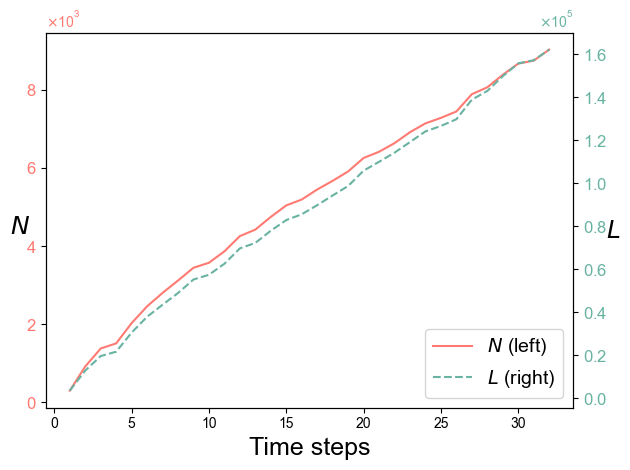

In [10]:
fname = f"../data/figure/time_evolution/time-evolution_{tag}_{timespan}_{tau}.pdf"
print(fname)
tb.plot_time_evolution(df, ncolor="#FF7A72", lcolor="#69B3A2", fname=fname)